In [1]:
from engine import Value

In [2]:
from graphviz import Digraph


g = Digraph('G', filename='hello.gv')

g.edge('Hello', 'World')

g.view()

'hello.gv.pdf'

In [3]:
x  = Value(5)
y  = 2  * x
y


Value(data=10, grad=0)

In [4]:
def trace_fn(root):

    nodes,edges = set(),set()
    def build(v):
        if v in nodes:
            return 
        nodes.add(v)
        for ch in v._prev:
            edges.add((ch,v))
            build(ch)
    build(root)
    return nodes,edges
nodes,edges = trace_fn(y)
nodes,edges

({Value(data=10, grad=0), Value(data=2, grad=0), Value(data=5, grad=0)},
 {(Value(data=2, grad=0), Value(data=10, grad=0)),
  (Value(data=5, grad=0), Value(data=10, grad=0))})

In [5]:
for n  in nodes:
    print(str(id(n)) )

4514335008
4514335152
4514335200


In [6]:
def draw_dot(root):
    #str(id(node)) acts as unique identifier
    #get nodes and edges from tracefn
    nodes,edges = trace_fn(root)
    # save in svg format ,graph should be  from  top to bottom
    dot = Digraph(format='svg',graph_attr={'rankdir': 'LR'} )
    for n in nodes:
        #draws node with record shape
        dot.node(name=str(id(n)),label= f'{{data [{n.data:.4f}] | grad[{n.grad:.4f}]}}',shape='record')
        if n.op:
            # if  there  is an operation create new op node connected to  destination  node
            dot.node(name=str(id(n)) + n.op,label=n.op)
            dot.edge(str(id(n)) + n.op,str(id(n)))
    for u,v in edges:
        #connect node with one with operator, child node to parent node(input node and operation node)
        dot.edge(str(id(u)),str(id(v))+v.op)
    return dot             
                 
            

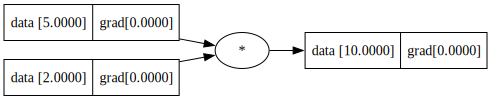

In [7]:
draw_dot(y)

In [8]:
x = Value(2.45)

y = 2*x+6.33
f = y - 2
p = x * f

In [9]:
nodes,edges = trace_fn(p)
print(f'nodes { nodes} ,edges {edges}')

nodes {Value(data=6.33, grad=0), Value(data=2.45, grad=0), Value(data=4.9, grad=0), Value(data=11.23, grad=0), Value(data=-2, grad=0), Value(data=2, grad=0), Value(data=9.23, grad=0), Value(data=22.613500000000002, grad=0)} ,edges {(Value(data=6.33, grad=0), Value(data=11.23, grad=0)), (Value(data=2.45, grad=0), Value(data=4.9, grad=0)), (Value(data=-2, grad=0), Value(data=9.23, grad=0)), (Value(data=2.45, grad=0), Value(data=22.613500000000002, grad=0)), (Value(data=11.23, grad=0), Value(data=9.23, grad=0)), (Value(data=9.23, grad=0), Value(data=22.613500000000002, grad=0)), (Value(data=2, grad=0), Value(data=4.9, grad=0)), (Value(data=4.9, grad=0), Value(data=11.23, grad=0))}


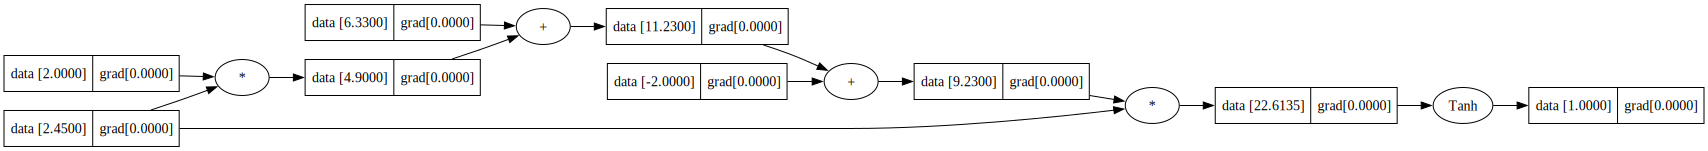

In [10]:
draw_dot(p.tanh())

In [11]:
p.backward()

In [12]:
x = Value(2)
w = 3.4
b = 1
y = w * x + b
y 


Value(data=7.8, grad=0)

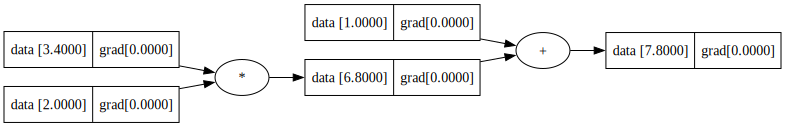

In [13]:
draw_dot(y)

In [14]:
from nn import Neuron,Layer,MLP
model = MLP(2,[10,10,1])

In [15]:
model

MLP of [Layer of ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), Layer of ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), ReLUNeuron(10), Layer of LinearNeuron(10)]

In [16]:
print(len(model.parameters()))

151


In [21]:
model.parameters()

[Value(data=0.45176203173587426, grad=0.0),
 Value(data=0.09727849442208181, grad=0.0),
 Value(data=1, grad=0.0),
 Value(data=0.7311768809613716, grad=0.0),
 Value(data=0.9158004443796642, grad=0.0),
 Value(data=1, grad=0.0),
 Value(data=0.6962165494433051, grad=0.0),
 Value(data=0.25277228418198905, grad=0.0),
 Value(data=1, grad=0.0),
 Value(data=0.18470365247329068, grad=0.0),
 Value(data=0.21903491565034516, grad=0.0),
 Value(data=1, grad=0.0),
 Value(data=0.1695963436106288, grad=0.0),
 Value(data=0.34233222890501414, grad=0.0),
 Value(data=1, grad=0.0),
 Value(data=0.555619625167942, grad=0),
 Value(data=0.48874855192514033, grad=0),
 Value(data=1, grad=0.0),
 Value(data=0.08308801020679879, grad=0),
 Value(data=0.35383985124694495, grad=0),
 Value(data=1, grad=0.0),
 Value(data=0.6792430334163418, grad=0),
 Value(data=0.9230815642269579, grad=0),
 Value(data=1, grad=0.0),
 Value(data=0.2625679318249481, grad=0),
 Value(data=0.349972181788362, grad=0),
 Value(data=1, grad=0.0),
 

In [18]:
import random

out = model(random.uniform(0,1) for _ in range(10))
out

Value(data=1.0, grad=0)

In [24]:
out.backward()

In [25]:
out._prev

{Value(data=32.3251971189064, grad=0.0)}